<a href="https://colab.research.google.com/github/Zaheer-Aswath/DataScience-Python/blob/main/SelfProjects/US%20Health%20Insurance%20Charge%20Prediction(Continuous)%20Using%20Linear%20Regression/Health_Insurance_Charge_Prediction(Continuous)_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used in this project is downloaded from - https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/

In [117]:
## Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


**Step-1:** Reading US Health Insurance Dataset as Pandas Dataframe:

In [118]:
df = pd.read_csv("insurance.csv")
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Step-2:** Performing Data Preprocessing:

In [119]:
## 2.1: Checking any null values:

display(df.isnull().sum())      #no null values present

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
## 2.2: Checking columns data types from dataset:

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [121]:
##Checking some basic statistical details:

display(df.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Step-3:** Performing EDA on dataset:

**Step-3.1:** Univariant Analysis - BMI, Age and Insurance charge Distribution visualization using histogram and finding outlier using boxplot

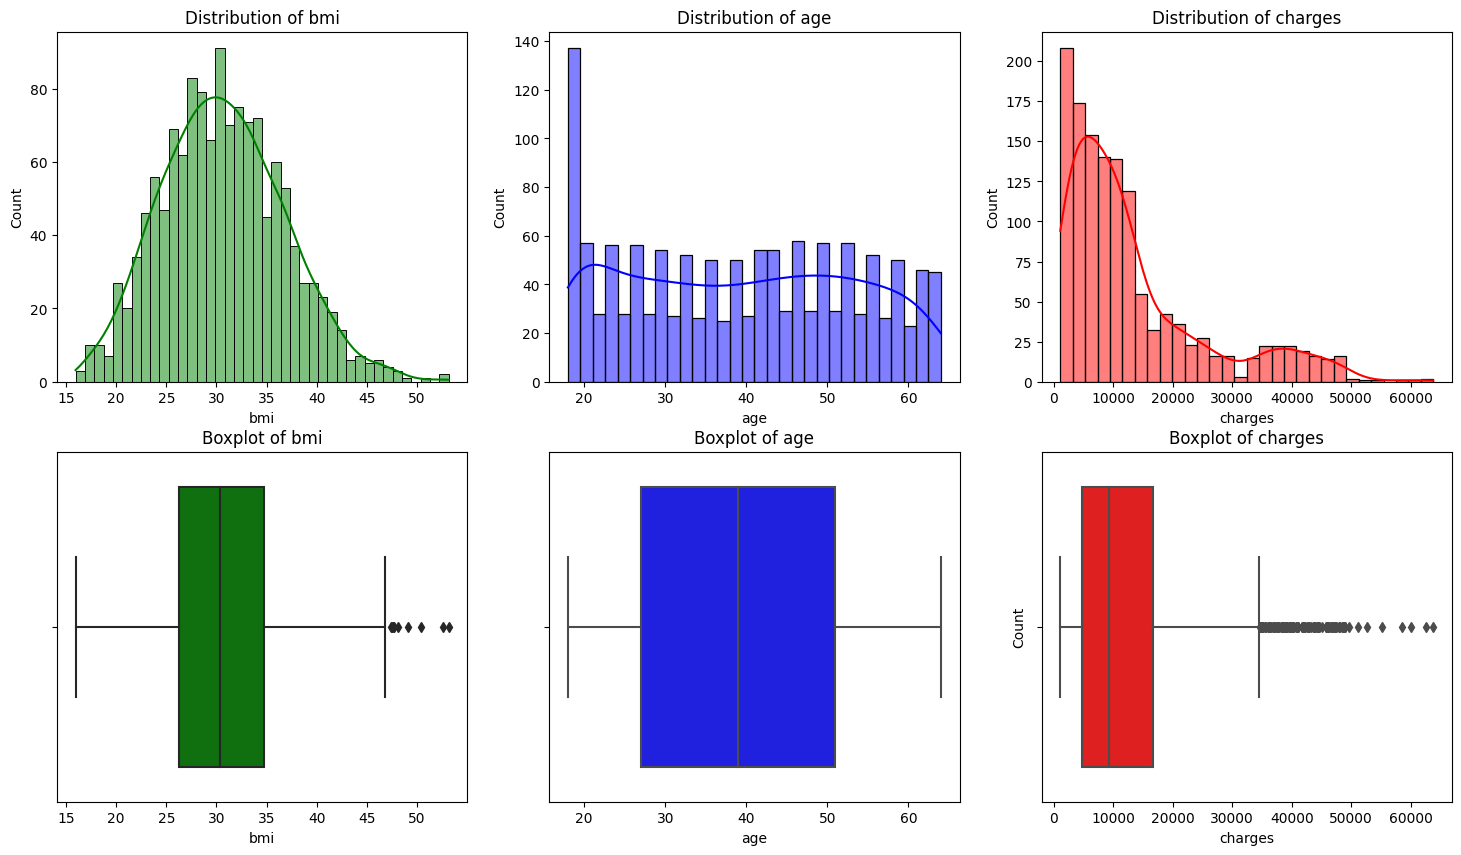

In [122]:
## Creating subplots to visualize distribution and outliers for bmi, age and charges:

figure, axes = plt.subplots(2, 3,figsize=(18, 10))

sns.histplot(df['bmi'], bins=40, kde=True, color='green', ax=axes[0][0])
axes[0][0].set_title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Count')

sns.histplot(df['age'], bins=30, kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Count')

sns.histplot(df['charges'], bins=30, kde=True, color='red', ax=axes[0][2])
axes[0][2].set_title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Count')

sns.boxplot(x= 'bmi',data=df,color='green', ax=axes[1][0])
axes[1][0].set_title('Boxplot of bmi')

sns.boxplot(x= 'age',data=df,color='blue', ax=axes[1][1])
axes[1][1].set_title('Boxplot of age')

sns.boxplot(x= 'charges',data=df,color='red', ax=axes[1][2])
axes[1][2].set_title('Boxplot of charges')

plt.show()

**Observation from above Visualization:**


1.   **BMI Distribution and Outliers:**
*   BMI in the given set follows normal distribution with median value around 30
*   We could also notice very few outliers on the far right side (near the maximum value)


2.   **Age Distribution and Outliers:**

*   Age in the given set follows Uniform distribution with median value around 39 indicating the frequency of each class is similar to one other
*   There are no outliers in the Age column

3.   **Insurance Charges Distribution and Outliers:**
*   The insurance charges column in the given set displays a right-skewed or positive distribution, which means a large number of data values occur on the left side (Mode) and fewer data on the right side.
*   Hence, we could also notice large number of outliers on the right side of the box plot

**Step-3.2:** Categorical variable Analysis - Sex, Smoker and Region visualization using bar plot

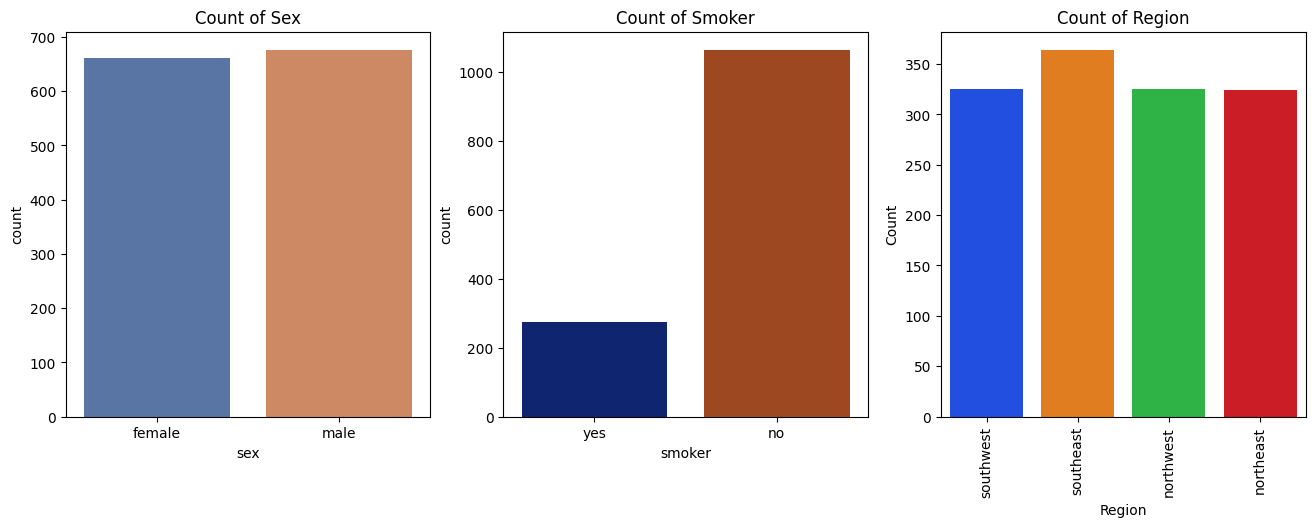

In [123]:
## Creating subplots to visualize the count of categories in sex, smoker and regions:

figure, axes = plt.subplots(1, 3,figsize=(16, 5))

sns.countplot(x='sex', data=df, palette='deep', ax=axes[0])
axes[0].set_title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

sns.countplot(x='smoker', data=df, palette='dark', ax=axes[1])
axes[1].set_title('Count of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

sns.countplot(x='region', data=df, palette='bright', ax=axes[2])
plt.xticks(rotation = 90)
axes[2].set_title('Count of Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()


Text(0, 0.5, 'Charge')

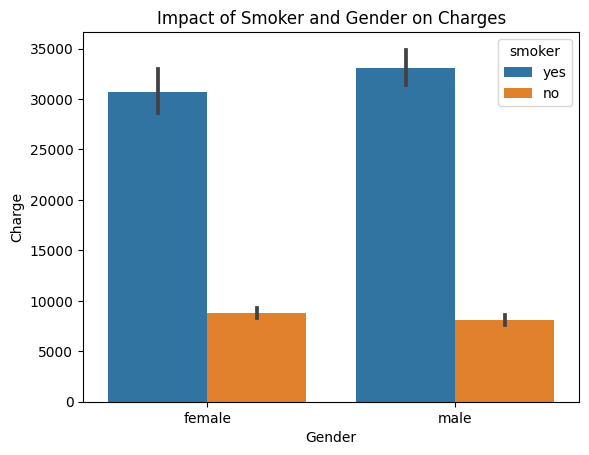

In [124]:
## Checking impact of Smoker and Gender on Charges:

sns.barplot(data = df, x = 'sex', y= 'charges',  hue = 'smoker')
plt.title('Impact of Smoker and Gender on Charges')
plt.xlabel('Gender')
plt.ylabel('Charge')

From the above visualization, we can infer that insurance charges for smokers is higher when compared to non-smokers, irrespective of gender

**Step-3.3:** Multivariant Analysis -Corelation Analysis

In [125]:
## Let us perform label encoding for categorical variables to find correlation between various columns:

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

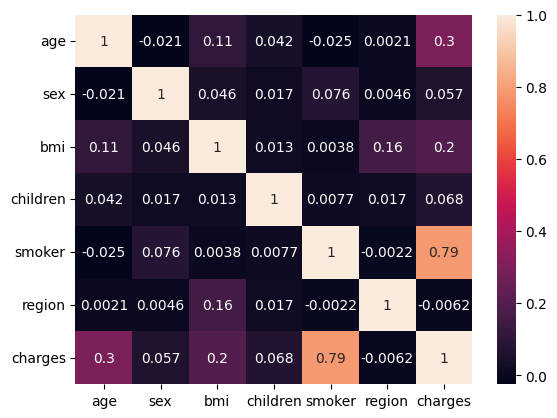

In [126]:
## Calculate and visualize the correlation matrix to identify relationships between numeric variables:

sns.heatmap(df.corr(numeric_only = True),annot=True)

**Inference:**

1. The variables Smoker and Insurance charges has highest positive correlation

2. Other variables like children, bmi, sex with charges have low positive corelation

3. The variable region have strong negative correlation with charges

**This shows that the column region is not significant in predicting the charges of insurance.**

**Step 3.4:** Using OLS model for categorical variables with the target variable (charges) to identify significance in predicting the charges and confirm the above inference.

In [127]:
## Predicting impact "smoker" against target variable "charges":

# Define the dependent variable (Y) and independent variable (X)
Y = df['charges']
X = sm.add_constant(df['smoker'])

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          8.27e-283
Time:                        06:51:40   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8434.2683    229.014     36.829      0.0

In [128]:
## Predicting impact "sex" against target variable "charges":

Y = df['charges']
X = sm.add_constant(df['sex'])

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Mon, 30 Oct 2023   Prob (F-statistic):             0.0361
Time:                        06:51:40   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    470.072     26.740      0.0

In [129]:
## Predicting impact "region" against target variable "charges":

Y = df['charges']
X = sm.add_constant(df['region'])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05149
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.821
Time:                        06:51:40   Log-Likelihood:                -14478.
No. Observations:                1338   AIC:                         2.896e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04    562.359     23.781      0.0

**Inference:**

1. From the above summaries, we can see that "smoker and charges" and "sex and charges" have strong positive coefficients and hence smoker and sex play significant role in predicting the charges.

2. However, region and charges has very less (negative) coefficient value.

**Thus we can remove "region" before building our model.**

In [130]:
## Dropping "region" column from dataframe as it has very low impact on prediction of charges:

df.drop("region", axis=1, inplace=True)
display(df)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


**Step-4:** Building models, fitting train data and predicting test data

In [131]:
## 4.1. Split data into x (independent features) and y(dependent features):

x = df.drop("charges", axis = 1)
#display(x)

y = df.charges
#display(y)

In [132]:
## 4.2. Split x and y into train and test data:

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
print("x_train and x_test dataset shape:",x_train.shape,x_test.shape)
print("y_train and y_test dataset shape:",y_train.shape,y_test.shape)

x_train and x_test dataset shape: (1070, 5) (268, 5)
y_train and y_test dataset shape: (1070,) (268,)


In [133]:
## 4.3.Calling the Linear Regression model, then fit the model using train data:

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [134]:
## 4.4.Predicting the values using trained model:

y_pred = lin_reg.predict(x_test)
#print(list(y_test)[10], y_pred[10])

In [135]:
## 4.5 Evaluate the model using Mean Absolute Error and R-squared values:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print('Mean Absolute Error: ', mae)
#print('R-squared: ',r2)

In [136]:
## 4.6 Create ridge model, fit the data, predict charges and find score:

ridgereg = Ridge(alpha = 0.00001)
ridgereg.fit(x_train,y_train)
ridge_pred =ridgereg.predict(x_test)

#print(list(y_test)[10], ridge_pred[10])
#Calculate score for ridge model

ridge_score = ridgereg.score(x_test, y_test)

# Evaluate Ridge model
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [137]:
## 4.7 Create lasso model, fit the data, predict charges and find score:

lassoreg = Lasso(alpha = 0.0001)
lassoreg.fit(x_train,y_train)
lasso_pred= lassoreg.predict(x_test)

#print(list(y_test)[10], lasso_pred[10])

#Calculate score for lasso model
lasso_score = lassoreg.score(x_test, y_test)

# Evaluate Lasso model
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [138]:
## 4.6 Printing the evaluated values for all the models

print("Linear Regression:")
print('Mean Absolute Error: ', mae)
print('R-squared: ',r2)

print("\nRidge Regression:")
print('Mean Absolute Error (MAE): ',ridge_mae)
print('R-squared: ', ridge_r2)

print("\nLasso Regression:")
print('Mean Absolute Error (MAE): ',lasso_mae)
print('R-squared: ',lasso_r2)

Linear Regression:
Mean Absolute Error:  4213.484797807137
R-squared:  0.7811302113434095

Ridge Regression:
Mean Absolute Error (MAE):  4213.484920594769
R-squared:  0.7811302089436568

Lasso Regression:
Mean Absolute Error (MAE):  4213.484869319737
R-squared:  0.7811302092230141


**Inference:**

**Consistency:**

The fact that the MAE and R-squared values are very close across all three models suggests that Ridge and Lasso regularization didn't significantly impact the model performance in this specific case.

**Model Fit:**

An R-squared value of approximately 0.78 indicates that the models explain around 78% of the variance in the target variable. This is a reasonably good fit for a linear regression model.

**Prediction Accuracy:**

The Mean Absolute Error (MAE) of around 4213.48 indicates, on average, the predictions are off by approximately $4213.48. The interpretation of the MAE depends on the scale of the target variable (charges in this case).

**Conclusion:**

Given the similarity in performance, we can conclude to choose the simpler linear regression model with 78 % accuracy

**Step - 5:** Testing the prediction with few more sample data

Taking below data from the dataset:

Age | Sex | BMI     |  children | Smoker | Charges

28	| 1	  | 33.000  |	3	        | 0	      | 4449.46200

61	| 0	  | 29.070	|0	       | 1	      | 29141.36030

50	| 1	  | 30.970	|3	        | 0	      | 10600.54830

In [139]:
test_data =  pd.DataFrame(
    {
        'age' : [28,61,50],
        'sex' : [1,0,1],
        'bmi' : [33.000,29.070,30.970],
        'children':[3,0,3],
        'smoker' :[0,1,0]
    }
)

test_data_predictions = lin_reg.predict(test_data)
#print(test_data_predictions)
test_data["predicted_charges"] = test_data_predictions

print("Testing model with given sample data for Insurance charges prediction:\n")
display(test_data)

Testing model with given sample data for Insurance charges prediction:



,age,sex,bmi,children,smoker,predicted_charges
0,28,1,33.00,3,0,7166.897143
1,61,0,29.07,0,1,36743.058001
2,50,1,30.97,3,0,12157.521280
